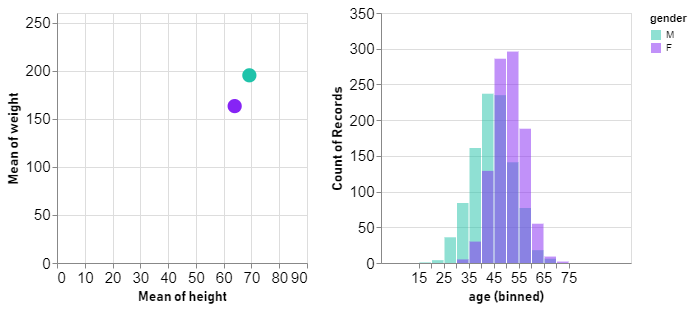

In [141]:
import altair as alt
alt.renderers.enable('notebook')
import pandas as pd
import numpy as np

# generate fake data
source = pd.DataFrame({'gender': ['M']*1000 + ['F']*1000,
               'height':np.concatenate((np.random.normal(69, 7, 1000),
                                       np.random.normal(64, 6, 1000))),
               'weight': np.concatenate((np.random.normal(195.8, 144, 1000),
                                        np.random.normal(167, 100, 1000))),
               'age': np.concatenate((np.random.normal(45, 8, 1000),
                                        np.random.normal(51, 6, 1000)))
        })

selector = alt.selection_single(empty='all', fields=['gender'])

color_scale = alt.Scale(domain=['M', 'F'],
                        range=['#1FC3AA', '#8624F5'])


base = alt.Chart(source).properties(
    width=250,
    height=250
).add_selection(selector)

points = base.mark_point(filled=True, size=200).encode(
    x=alt.X('mean(height):Q',
            scale=alt.Scale(domain=[0,84])),
    y=alt.Y('mean(weight):Q',
            scale=alt.Scale(domain=[0,250])),
    color=alt.condition(selector,
                        'gender:N',
                        alt.value('lightgray'),
                        scale=color_scale),
).interactive()

hists = base.mark_bar(opacity=0.5, thickness=100).encode(
    x=alt.X('age',
            bin=alt.Bin(step=5), # step keeps bin size the same
            scale=alt.Scale(domain=[0,100])),
    y=alt.Y('count()',
            stack=None,
            scale=alt.Scale(domain=[0,350])),
    color=alt.Color('gender:N',
                    scale=color_scale)
).transform_filter(
    selector
)


(points | hists).configure_axis(labelFontSize=15, titleFontSize=14, titleFont='Bahnschrift')

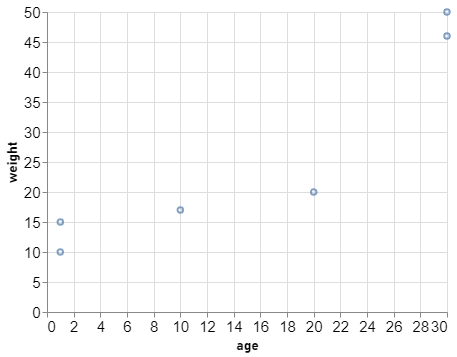

In [142]:
df = pd.DataFrame({'age': [30, 30, 1, 1, 10, 20 ], 'weight': [46, 50, 10, 15, 17, 20]})
chart = alt.Chart(df).configure_axis(labelFontSize=15, titleFontSize=14, titleFont='Bahnschrift')
chart.mark_point().encode(x='age', y='weight')

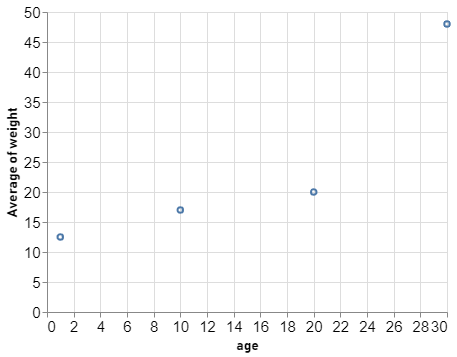

In [143]:
chart.mark_point().encode(x='age', y='average(weight)')

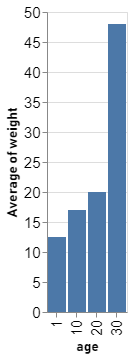

In [144]:
chart.mark_bar().encode(x='age:O', y='average(weight)')

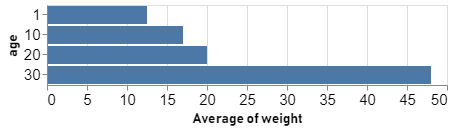

In [145]:
chart.mark_bar().encode(y='age:O', x='average(weight)')

In [146]:
print(chart.mark_bar().encode(y='age:O', x='average(weight)').to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.3.0.json",
  "config": {
    "axis": {
      "labelFontSize": 15,
      "titleFont": "Bahnschrift",
      "titleFontSize": 14
    },
    "mark": {
      "tooltip": null
    },
    "view": {
      "height": 300,
      "width": 400
    }
  },
  "data": {
    "name": "data-ac14ffa81cac90dd7b22ce89f6da85db"
  },
  "datasets": {
    "data-ac14ffa81cac90dd7b22ce89f6da85db": [
      {
        "age": 30,
        "weight": 46
      },
      {
        "age": 30,
        "weight": 50
      },
      {
        "age": 1,
        "weight": 10
      },
      {
        "age": 1,
        "weight": 15
      },
      {
        "age": 10,
        "weight": 17
      },
      {
        "age": 20,
        "weight": 20
      }
    ]
  },
  "encoding": {
    "x": {
      "aggregate": "average",
      "field": "weight",
      "type": "quantitative"
    },
    "y": {
      "field": "age",
      "type": "ordinal"
    }
  },
  "mark": "bar"
}


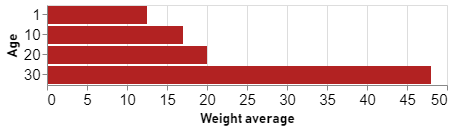

In [147]:
chart.mark_bar(color='firebrick').encode(alt.Y('age:O', title='Age'), alt.X('average(weight)', title='Weight average'))

In [148]:
chart.mark_bar(color='firebrick').encode(alt.Y('age:O', title='Age'), alt.X('average(weight)', title='Weight average')).save('chart.html')

In [149]:
from vega_datasets import data

df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


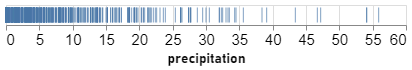

In [150]:
chart = alt.Chart(df).mark_tick().encode(x='precipitation').configure_axis(labelFontSize=15, titleFontSize=14, titleFont='Bahnschrift')
chart

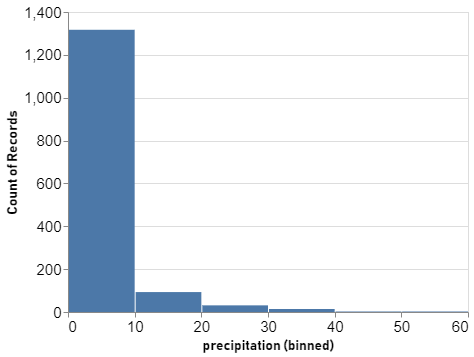

In [151]:
chart.mark_bar().encode( alt.X('precipitation', bin=True), y='count()')

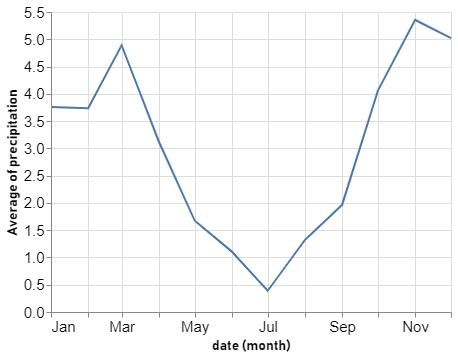

In [152]:
chart.mark_line().encode(x='month(date):T', y='average(precipitation)')

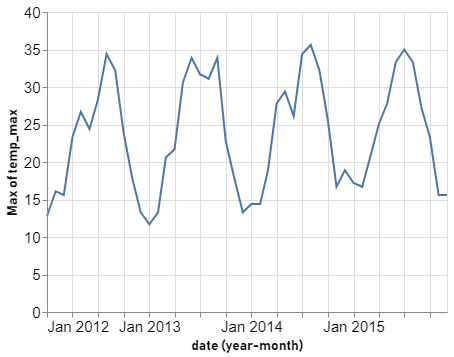

In [153]:
chart.mark_line().encode(x='yearmonth(date):T', y='max(temp_max)')

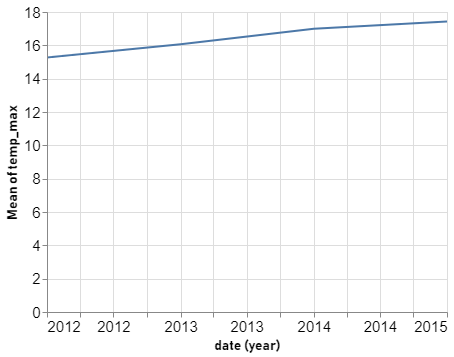

In [154]:
chart.mark_line().encode(x='year(date):T', y='mean(temp_max)')

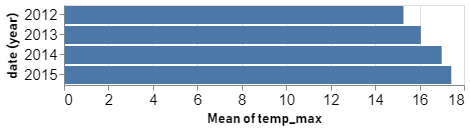

In [155]:
chart.mark_bar().encode(y='year(date):O', x='mean(temp_max)')

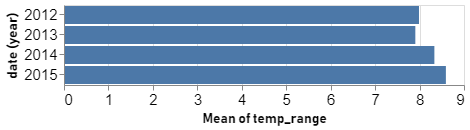

In [156]:
chart.mark_bar().encode(y='year(date):O', x='mean(temp_range):Q'
).transform_calculate(temp_range='datum.temp_max - datum.temp_min')

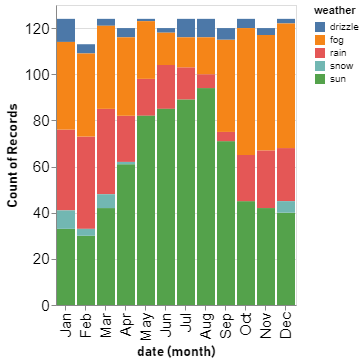

In [157]:
chart.mark_bar().encode(y='count()', x='month(date):N', color='weather')

In [158]:
scale = alt.Scale(domain=['sun', 'fog', 'snow', 'rain', 'drizzle'],
                 range=['#e7ba52', '#c7c7c7', '#aec7e8', '#1f77be', '#9467bd'])

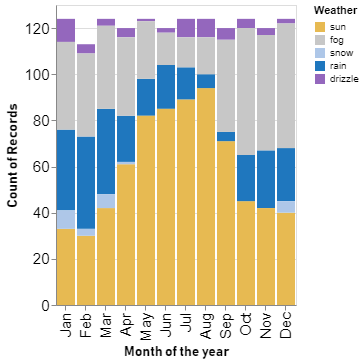

In [159]:
chart.mark_bar().encode(y='count()', x=alt.X('month(date):N', title='Month of the year'), 
                        color=alt.Color('weather', scale=scale, legend=alt.Legend(title='Weather')))

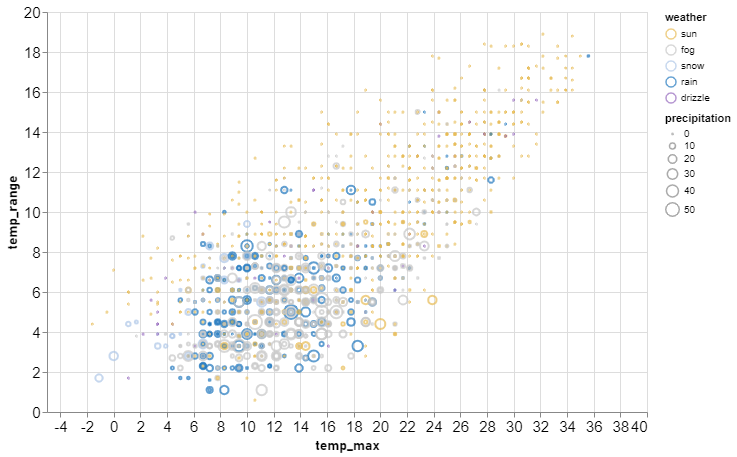

In [166]:
chart.mark_point().encode(
     x='temp_max',
     y='temp_range:Q',
     color=alt.Color('weather', scale=scale),
     size=alt.Size('precipitation', scale=alt.Scale(range=[1,200]))
 ).transform_calculate(temp_range='datum.temp_max - datum.temp_min').properties(width=600, height=400).interactive()

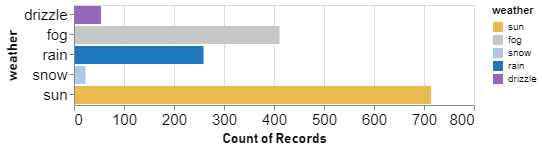

In [169]:
chart.mark_bar().encode(x='count()', y='weather', color=alt.Color('weather', scale=scale))

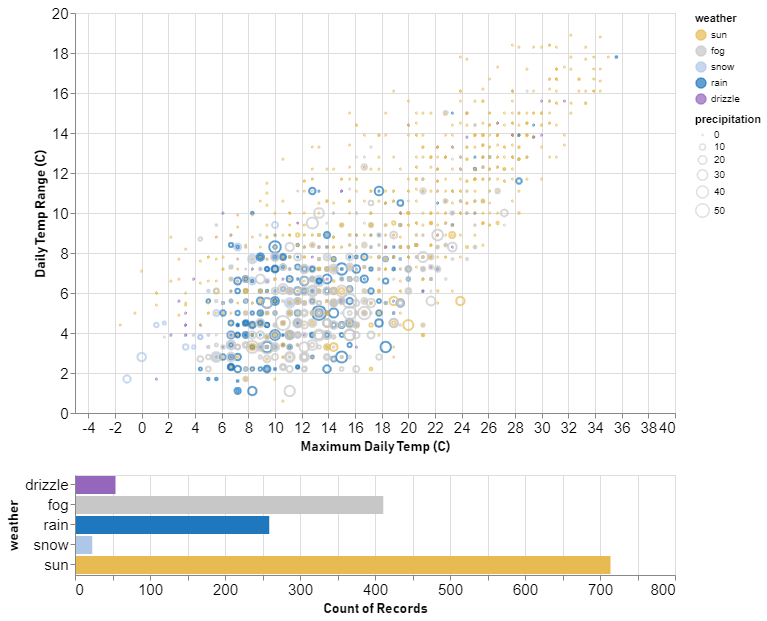

In [180]:
brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    alt.X('temp_max:Q', title='Maximum Daily Temp (C)'),
    alt.Y('temp_range:Q', title='Daily Temp Range (C)'),
    color=alt.condition(brush, 'weather:N', alt.value('lightgray'), scale=scale),
    size=alt.Size('precipitation:Q', scale=alt.Scale(range=[1, 200]))
).transform_calculate(temp_range='datum.temp_max - datum.temp_min'
).properties(width=600, height=400
).add_selection(brush)

bars = alt.Chart().mark_bar().encode(x='count()', y='weather:N', color=alt.Color('weather', scale=scale)
).transform_calculate('temp_range', 'datum.temp_max - datum.temp_min'
).transform_filter(brush).properties(width=600)

alt.vconcat(points, bars, data=df).configure_axis(labelFontSize=15, titleFontSize=14, titleFont='Bahnschrift')

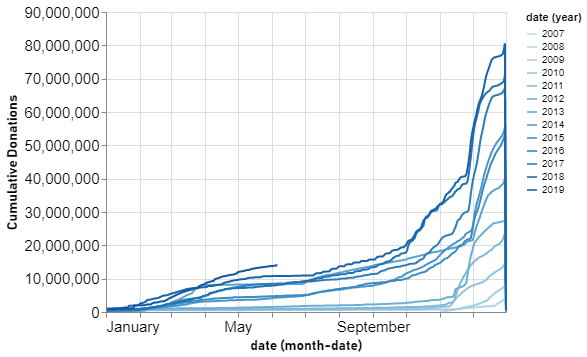

In [224]:
source = "https://frdata.wikimedia.org/donationdata-vs-day.csv"

alt.Chart(source).mark_line().encode(
    x=alt.X('monthdate(date):T', axis=alt.Axis(format='%B')),
    y=alt.Y('max(ytdsum):Q', title='Cumulative Donations'),
    color='year(date):O',
    order='year(data):O'
).configure_axis(labelFontSize=15, titleFontSize=14, titleFont='Bahnschrift')

[[-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]]
(10, 10)
[-5 -4 -3 -2 -1  0  1  2  3  4 -5 -4 -3 -2 -1  0  1  2  3  4 -5 -4 -3 -2
 -1  0  1  2  3  4 -5 -4 -3 -2 -1  0  1  2  3  4 -5 -4 -3 -2 -1  0  1  2
  3  4 -5 -4 -3 -2 -1  0  1  2  3  4 -5 -4 -3 -2 -1  0  1  2  3  4 -5 -4
 -3 -2 -1  0  1  2  3  4 -5 -4 -3 -2 -1  0  1  2  3  4 -5 -4 -3 -2 -1  0
  1  2  3  4]
(100,)


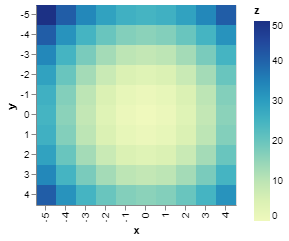

In [231]:
# https://altair-viz.github.io/gallery/simple_heatmap.html
x, y = np.meshgrid(range(-5, 5), range(-5, 5))
z = x ** 2 + y ** 2
print(x)
print(x.shape)
r = x.ravel()
print(r)
print(r.shape)

# Convert this grid to columnar data expected by Altair
source = pd.DataFrame({'x': x.ravel(),
                     'y': y.ravel(),
                     'z': z.ravel()})

alt.Chart(source).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q'
)